In [1]:
#from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from imblearn.over_sampling import SMOTE

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
filepath = 'digital_marketing_campaign_dataset.csv'
marketing_data = pd.read_csv(filepath, sep=',')

marketing_data.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [9]:
target = marketing_data[['Conversion']]

type(target)

pandas.core.frame.DataFrame

In [11]:
target.head()

,Conversion
0,1
1,1
2,1
3,1
4,1


In [13]:
#features = marketing_data.drop(['Conversion'], axis = 1)

In [17]:
features = marketing_data.drop(columns=['CustomerID', 'AdvertisingPlatform', 'AdvertisingTool', 'Conversion'])

Drop unnecessary columns for prediction that provide no additional information (CustomerID is completely unique, while platform and tool are confidental - they contain 1 value only).

In [20]:
features.head()

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints
0,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688
1,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459
2,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337
3,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463
4,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345


In [22]:
feature_cols = features.columns
feature_cols

Index(['Age', 'Gender', 'Income', 'CampaignChannel', 'CampaignType', 'AdSpend',
       'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit',
       'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks',
       'PreviousPurchases', 'LoyaltyPoints'],
      dtype='object')

In [24]:
features = pd.get_dummies(features, drop_first=False)

In [26]:
features

,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,...,Gender_Male,CampaignChannel_Email,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media,CampaignType_Awareness,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention
0,56,136912,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,...,False,False,False,False,False,True,True,False,False,False
1,69,41760,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,...,True,True,False,False,False,False,False,False,False,True
2,46,88456,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,...,False,False,True,False,False,False,True,False,False,False
3,32,44085,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,...,False,False,True,False,False,False,False,False,True,False
4,60,83964,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,21,24849,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,...,True,True,False,False,False,False,True,False,False,False
7996,43,44718,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,...,False,False,False,False,True,False,False,False,False,True
7997,28,125471,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,...,False,False,False,True,False,False,False,True,False,False
7998,19,107862,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,...,False,False,True,False,False,False,False,True,False,False


In [28]:
#features.columns

In [30]:
feature_cols = features.columns
feature_cols

Index(['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'Gender_Female', 'Gender_Male', 'CampaignChannel_Email',
       'CampaignChannel_PPC', 'CampaignChannel_Referral',
       'CampaignChannel_SEO', 'CampaignChannel_Social Media',
       'CampaignType_Awareness', 'CampaignType_Consideration',
       'CampaignType_Conversion', 'CampaignType_Retention'],
      dtype='object')

In [32]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify=target)

In [34]:
X_train.head()

,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,...,Gender_Male,CampaignChannel_Email,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media,CampaignType_Awareness,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention
3141,36,97233,9652.953673,0.206275,0.078099,17,3.641113,3.348996,77,12,...,True,False,False,True,False,False,True,False,False,False
7099,60,79261,8606.305759,0.229620,0.131101,24,7.868377,1.234353,84,12,...,False,False,False,False,False,True,False,False,True,False
2939,65,97614,4208.041944,0.258820,0.187441,22,5.801655,3.355644,73,19,...,True,False,True,False,False,False,False,False,False,True
6884,24,68533,2931.437787,0.213318,0.146084,33,6.198697,12.038587,74,4,...,False,False,False,False,False,True,False,True,False,False
7583,60,101331,8651.058531,0.293985,0.052343,8,9.054078,2.462050,41,5,...,True,False,False,True,False,False,False,False,False,True


In [36]:
len(X_train)

5600

In [38]:
len(X_test)

2400

In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
X_train

array([[-0.51502072,  0.33645438,  1.64562587, ..., -0.56937695,
        -0.59274898, -0.57102672],
       [ 1.10595218, -0.14287092,  1.27618155, ..., -0.56937695,
         1.68705478, -0.57102672],
       [ 1.44365487,  0.34661591, -0.27631145, ..., -0.56937695,
        -0.59274898,  1.75123154],
       ...,
       [-0.98780448, -1.63914889,  1.2394056 , ..., -0.56937695,
        -0.59274898,  1.75123154],
       [ 1.17349272,  0.43956319,  0.44232635, ..., -0.56937695,
         1.68705478, -0.57102672],
       [ 1.17349272,  1.39303968,  0.00690877, ..., -0.56937695,
        -0.59274898,  1.75123154]])

In [44]:
y_train.value_counts(normalize=True)

Conversion
1             0.876429
0             0.123571
Name: proportion, dtype: float64

In [46]:
y_test.value_counts(normalize=True)

Conversion
1             0.876667
0             0.123333
Name: proportion, dtype: float64

The distribution is imbalanced, which is why oversampling is needed. When not using oversampling, logistic regression predictions had bad recall or predicted 0 of the less present category (meaning precision and recall for the "not converted" category defaulted to zero).

In [49]:
y_train = y_train.values.ravel()

## Balanced train-test split for target

In [52]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
columns = X_train.columns

In [54]:
smote = SMOTE(random_state=0)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [55]:
y_train_res

,Conversion
0,1
1,1
2,0
3,1
4,1
...,...
9801,0
9802,0
9803,0
9804,0


In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled  = scaler.transform(X_test)

The above is crucial for the model to converge! Otherwise 62.8% was reached with a warning.

In [61]:
#Checking the numbers of our oversampled data
print("length of oversampled data is ",len(X_train_res))
print("Number of no conversion in oversampled data",len(y_train_res[y_train_res['Conversion']==0]))
print("Number of conversion",len(y_train_res[y_train_res['Conversion']==1]))
print("Proportion of no conversion data in oversampled data is ",len(y_train_res[y_train_res['Conversion']==0])/len(X_train_res))
print("Proportion of conversion data in oversampled data is ",len(y_train_res[y_train_res['Conversion']==1])/len(X_train_res))

length of oversampled data is  9806
Number of no conversion in oversampled data 4903
Number of conversion 4903
Proportion of no conversion data in oversampled data is  0.5
Proportion of conversion data in oversampled data is  0.5


## Imbalanced Base Logistic Regression results (for documentation)

In [64]:
# Initialize and train the logistic regression model
model_lr_base = LogisticRegression() # C=1.0, max_iter=100
model_lr_base.fit(X_train, y_train)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
# Make predictions on the test set
y_pred = model_lr_base.predict(X_test)

In [68]:
# Evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy Score:')
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[   2  289]
 [   2 2107]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.01      0.01       291
           1       0.88      1.00      0.94      2109

    accuracy                           0.88      2400
   macro avg       0.69      0.50      0.47      2400
weighted avg       0.83      0.88      0.82      2400


Accuracy Score:
0.87875


In [70]:
y_train_res = y_train_res.values.ravel()

## Base Logistic Regression with balanced data

In [73]:
feature_cols

Index(['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'Gender_Female', 'Gender_Male', 'CampaignChannel_Email',
       'CampaignChannel_PPC', 'CampaignChannel_Referral',
       'CampaignChannel_SEO', 'CampaignChannel_Social Media',
       'CampaignType_Awareness', 'CampaignType_Consideration',
       'CampaignType_Conversion', 'CampaignType_Retention'],
      dtype='object')

In [75]:
# Initialize and train the logistic regression model
lr_base = LogisticRegression()  # C=1.0, max_iter=100
lr_base.fit(X_train_scaled, y_train_res)

LogisticRegression()

In [77]:
# Make predictions on the test set
y_pred = lr_base.predict(X_test_scaled)

In [79]:
# Evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy Score:')
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[  75  216]
 [  42 2067]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.26      0.37       291
           1       0.91      0.98      0.94      2109

    accuracy                           0.89      2400
   macro avg       0.77      0.62      0.65      2400
weighted avg       0.87      0.89      0.87      2400


Accuracy Score:
0.8925


Accuracy reached 89.25% with the utilaziton of SMOTE and Standard Scaler after the train-test split. Note the y_test did not undergo SMOTE oversampling. This is a massive increase compared to training the model with the imbalanced set or not using standard scaler. The critical value, the Recall for category 0 (no conversion) reached 26%. It is still the weakest value.

Increasing iterations next.

## Parameterized logistic regression with balanced data

In [84]:
# Initialize and train the logistic regression model
lr = LogisticRegression(C=.001, max_iter=295).fit(X_train_scaled, y_train_res)

In [86]:
y_pred = lr.predict(X_test_scaled)

In [88]:
# Evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy Score:')
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[ 130  161]
 [ 139 1970]]

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.45      0.46       291
           1       0.92      0.93      0.93      2109

    accuracy                           0.88      2400
   macro avg       0.70      0.69      0.70      2400
weighted avg       0.87      0.88      0.87      2400


Accuracy Score:
0.875


Recall for class 0 increased significantly with a slight decrease in accuracy.

In [91]:
# Initialize and train the logistic regression model
lr_high_iter = LogisticRegression(C=.001, max_iter=500).fit(X_train_scaled, y_train_res)

In [93]:
y_pred = lr_high_iter.predict(X_test_scaled)

In [95]:
# Evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy Score:')
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[ 130  161]
 [ 139 1970]]

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.45      0.46       291
           1       0.92      0.93      0.93      2109

    accuracy                           0.88      2400
   macro avg       0.70      0.69      0.70      2400
weighted avg       0.87      0.88      0.87      2400


Accuracy Score:
0.875


No further increase in accuracy is achieved by increasingthe number of iterations, the model already converged with 100 iterations.

## Lasso regression

In [99]:
# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train_scaled, y_train_res)

In [101]:
y_pred = lr_l1.predict(X_test_scaled)

In [103]:
# Evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy Score:')
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[  76  215]
 [  42 2067]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.26      0.37       291
           1       0.91      0.98      0.94      2109

    accuracy                           0.89      2400
   macro avg       0.77      0.62      0.66      2400
weighted avg       0.87      0.89      0.87      2400


Accuracy Score:
0.8929166666666667


The lasso (L1) regularization that provides automatic feature selection by shrinking coefficients towards zero, reached 89.29% accuracy. This is very slightly higher compared to the first logistic regression model (89.25%), but its very close. The recall for not converting (0) is 0.26, the same as the base logistic regression (0.88).

## Ridge regression

In [107]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=1, cv=4, penalty='l2').fit(X_train_scaled, y_train_res)

In [109]:
y_pred = lr_l2.predict(X_test_scaled)

In [111]:
# Evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy Score:')
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[ 162  129]
 [ 260 1849]]

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.56      0.45       291
           1       0.93      0.88      0.90      2109

    accuracy                           0.84      2400
   macro avg       0.66      0.72      0.68      2400
weighted avg       0.87      0.84      0.85      2400


Accuracy Score:
0.8379166666666666


The ridge (L2) regularization achieved 83.79% accuracy. The recall reachred the highes value of 0.56 but precsion values are also lower. Ridge regression is another form of regularization, which accounts for multicollienarity but it did not improve the results.

## Parameterized logistic regression with imbalanced data (for documentation)

In [115]:
lr = LogisticRegression(C=.001, max_iter=295).fit(X_train, y_train)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [117]:
y_pred = lr.predict(X_test)

In [123]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred, zero_division=0))
print('\nAccuracy Score:')
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[   1  290]
 [   1 2108]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.00      0.01       291
           1       0.88      1.00      0.94      2109

    accuracy                           0.88      2400
   macro avg       0.69      0.50      0.47      2400
weighted avg       0.83      0.88      0.82      2400


Accuracy Score:
0.87875


## Other

In [126]:
print(features.columns.tolist())

['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints', 'Gender_Female', 'Gender_Male', 'CampaignChannel_Email', 'CampaignChannel_PPC', 'CampaignChannel_Referral', 'CampaignChannel_SEO', 'CampaignChannel_Social Media', 'CampaignType_Awareness', 'CampaignType_Consideration', 'CampaignType_Conversion', 'CampaignType_Retention']


In [128]:
print(feature_cols)

Index(['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'Gender_Female', 'Gender_Male', 'CampaignChannel_Email',
       'CampaignChannel_PPC', 'CampaignChannel_Referral',
       'CampaignChannel_SEO', 'CampaignChannel_Social Media',
       'CampaignType_Awareness', 'CampaignType_Consideration',
       'CampaignType_Conversion', 'CampaignType_Retention'],
      dtype='object')


In [130]:
marketing_data.Conversion

0       1
1       1
2       1
3       1
4       1
       ..
7995    0
7996    0
7997    1
7998    1
7999    0
Name: Conversion, Length: 8000, dtype: int64

## Random Forest

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
X_train_scaled.shape

(9806, 24)

In [137]:
y_train_res.shape

(9806,)

In [139]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train_res)

RandomForestClassifier(random_state=42)

In [141]:
y_pred = rf_model.predict(X_test_scaled)

In [143]:
# Evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy Score:')
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[  64  227]
 [  60 2049]]

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.22      0.31       291
           1       0.90      0.97      0.93      2109

    accuracy                           0.88      2400
   macro avg       0.71      0.60      0.62      2400
weighted avg       0.85      0.88      0.86      2400


Accuracy Score:
0.8804166666666666


Overall, the model achieved an accuracy of 88.04%. This means that 88.04% of the total predictions made by the model were correct.

In [146]:
feature_importances = rf_model.feature_importances_
feature_names = feature_cols
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)
print(feature_df)

                         Feature  Importance
2                        AdSpend    0.064420
10                   EmailClicks    0.063492
7                     TimeOnSite    0.061916
9                     EmailOpens    0.060119
3               ClickThroughRate    0.057739
21    CampaignType_Consideration    0.052584
12                 LoyaltyPoints    0.050937
20        CampaignType_Awareness    0.049296
11             PreviousPurchases    0.047947
23        CampaignType_Retention    0.047660
6                  PagesPerVisit    0.047096
1                         Income    0.045543
13                 Gender_Female    0.044618
14                   Gender_Male    0.043577
4                 ConversionRate    0.043548
5                  WebsiteVisits    0.040988
8                   SocialShares    0.036353
0                            Age    0.033499
22       CampaignType_Conversion    0.028217
19  CampaignChannel_Social Media    0.019392
15         CampaignChannel_Email    0.017129
18        

In the model the most important features that affect the model are Amount of Dollar on Ad spent, Number of email clicks and Time spent on the website.

## Using different Random Forest hyperparameters

In [150]:
rf_model = RandomForestClassifier(random_state=42)

In [152]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Maximum depth of trees
    'min_samples_split': [2, 5],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2]     # Minimum samples required at leaf node
}

In [154]:
from sklearn.model_selection import GridSearchCV  
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [156]:
grid_search.fit(X_train_scaled, y_train_res)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [158]:
print("Best Hyperparameters found: ", grid_search.best_params_)

Best Hyperparameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [160]:
best_rf_model = grid_search.best_estimator_

In [162]:
y_pred = best_rf_model.predict(X_test_scaled)

In [164]:
# Evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy Score:')
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[  63  228]
 [  46 2063]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.22      0.32       291
           1       0.90      0.98      0.94      2109

    accuracy                           0.89      2400
   macro avg       0.74      0.60      0.63      2400
weighted avg       0.86      0.89      0.86      2400


Accuracy Score:
0.8858333333333334


With the tuning the metrix slightly increased. 

In [167]:
feature_importances = best_rf_model.feature_importances_
feature_names = feature_cols
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)
print(feature_df)

                         Feature  Importance
10                   EmailClicks    0.064005
2                        AdSpend    0.063331
7                     TimeOnSite    0.062659
9                     EmailOpens    0.059337
3               ClickThroughRate    0.058235
21    CampaignType_Consideration    0.052750
20        CampaignType_Awareness    0.050235
12                 LoyaltyPoints    0.049056
11             PreviousPurchases    0.048551
23        CampaignType_Retention    0.048068
13                 Gender_Female    0.047262
6                  PagesPerVisit    0.046924
1                         Income    0.045143
14                   Gender_Male    0.044622
4                 ConversionRate    0.043768
5                  WebsiteVisits    0.040315
8                   SocialShares    0.035534
0                            Age    0.033681
22       CampaignType_Conversion    0.028567
19  CampaignChannel_Social Media    0.018852
15         CampaignChannel_Email    0.016494
16        

With the tuning, the order has changed between the 3 features that were the most important.

## XGBoost

In [171]:
#pip install xgboost

In [173]:
import xgboost as xgb

In [175]:
X_train_scaled.shape

(9806, 24)

In [177]:
y_train_res.shape

(9806,)

In [179]:
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1, 
    max_depth=6,  
    objective='binary:logistic',  # For binary classification, change for multi-class or regression
    random_state=42
)

In [181]:
xgb_model.fit(X_train_scaled, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [183]:
y_pred = xgb_model.predict(X_test_scaled)

In [185]:
# Evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy Score:')
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[ 120  171]
 [  35 2074]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.41      0.54       291
           1       0.92      0.98      0.95      2109

    accuracy                           0.91      2400
   macro avg       0.85      0.70      0.75      2400
weighted avg       0.91      0.91      0.90      2400


Accuracy Score:
0.9141666666666667


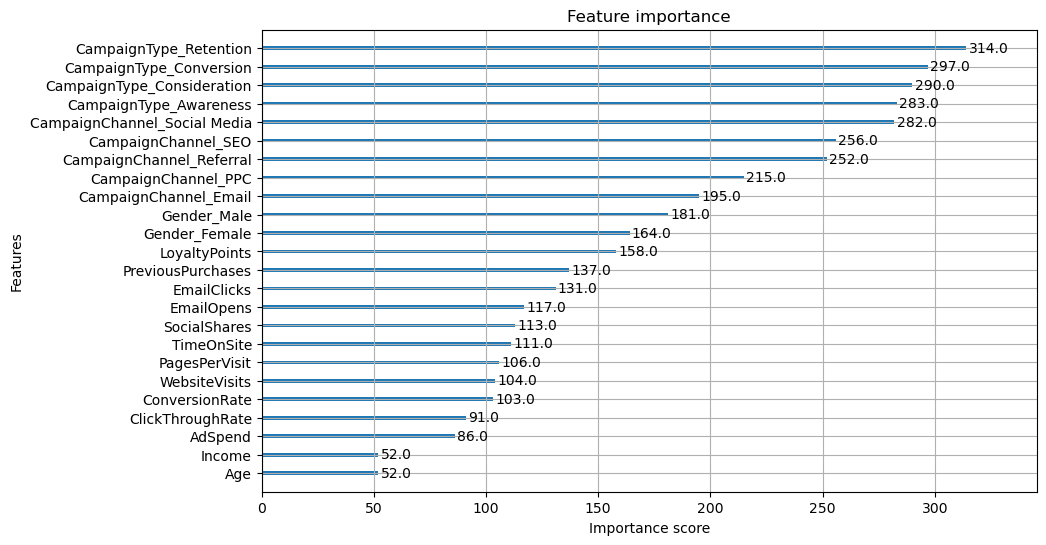

In [187]:
fig, ax = plt.subplots(figsize=(10, 6))
xgb.plot_importance(xgb_model, importance_type='weight', ax=ax)
ax.set_yticklabels(feature_cols)

plt.show()

Features related to the campaign types (like CampaignType_Retention, CampaignType_Conversion) have the highest importance scores. These features strongly influence the model's predictions, which suggests that campaign strategy is crucial in predicting the target variable

## Hyperparameter Tuning for XGBoost

In [191]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10]
}

In [193]:
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(random_state=42), param_grid=param_grid, cv=3, verbose=2)

In [195]:
grid_search.fit(X_train_scaled, y_train_res)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=6, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=6, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=6, n_e

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [197]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}


In [199]:
best_xgb_model = grid_search.best_estimator_
y_pred_best = best_xgb_model.predict(X_test_scaled)

In [201]:
# Evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy Score:')
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[ 120  171]
 [  35 2074]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.41      0.54       291
           1       0.92      0.98      0.95      2109

    accuracy                           0.91      2400
   macro avg       0.85      0.70      0.75      2400
weighted avg       0.91      0.91      0.90      2400


Accuracy Score:
0.9141666666666667


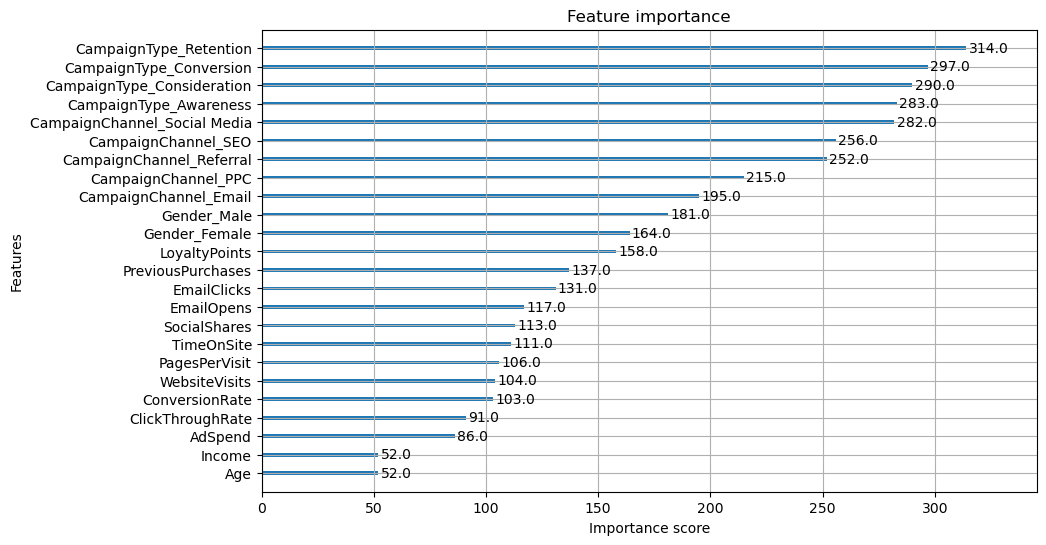

In [203]:
fig, ax = plt.subplots(figsize=(10, 6))
xgb.plot_importance(xgb_model, importance_type='weight', ax=ax)
ax.set_yticklabels(feature_cols)

plt.show()

## XGBoost Regression

In [206]:
X_train_scaled.shape

(9806, 24)

In [208]:
y_train_res.shape

(9806,)

In [210]:
xgb_regressor = xgb.XGBRegressor(
    n_estimators=100,  
    learning_rate=0.1, 
    max_depth=6,  
    objective='reg:squarederror',  
    random_state=42
)

# Train the model
xgb_regressor.fit(X_train_scaled, y_train_res)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [212]:
y_pred = xgb_regressor.predict(X_test_scaled)

In [214]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R-squared (R²) score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 0.08762987330777844
R-squared (R²): 0.1775583028793335


## Ensemble method experiments

In [217]:
xgb_on_original = xgb.XGBClassifier(n_estimators=400, max_depth = 12, random_state=45)
xgb_original_model = xgb_on_original.fit(X_train, y_train)
xgb_original_model.score(X_test, y_test)

0.9208333333333333

In [219]:
y_pred = xgb_original_model.predict(X_test)

f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1}")

F1-score: 0.9562615101289135


In [221]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy Score:')
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[ 133  158]
 [  32 2077]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.46      0.58       291
           1       0.93      0.98      0.96      2109

    accuracy                           0.92      2400
   macro avg       0.87      0.72      0.77      2400
weighted avg       0.91      0.92      0.91      2400


Accuracy Score:
0.9208333333333333


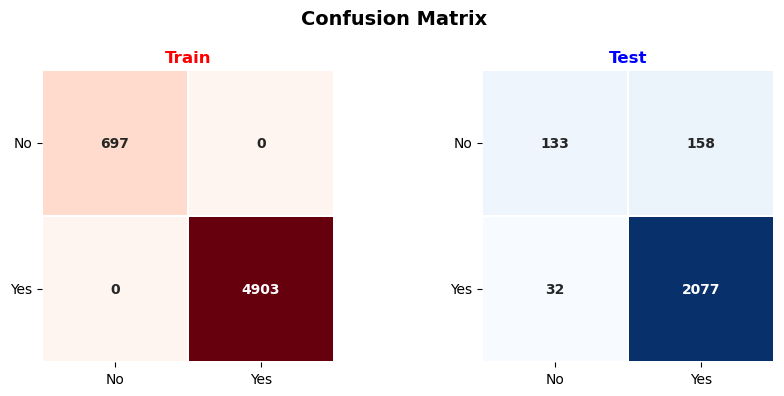

In [223]:
y_pred_train = xgb_original_model.predict(X_train)

cf_mx_train = confusion_matrix(y_train, y_pred_train)
cf_mx_test = confusion_matrix(y_test, y_pred)

fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (9, 4))

sns.heatmap(cf_mx_train, 
            annot = True, 
            annot_kws = {'fontsize':10, 'fontweight':'bold'},
            fmt = '',
            cmap = 'Reds', 
            cbar = False,
            square = True, 
            linewidths = 1.1,
            yticklabels = ['No', 'Yes'],
            xticklabels = ['No', 'Yes'],
            ax = ax[0])
ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation = 0)
ax[0].set_title("Train", fontsize = 12, fontweight = 'bold', color = 'red')

sns.heatmap(cf_mx_test, 
            annot = True,
            annot_kws = {'fontsize':10, 'fontweight':'bold'},
            fmt = '',
            cmap = 'Blues',
            cbar = False,
            square = True,
            linewidths = 1.1,
            yticklabels = ['No', 'Yes'],
            xticklabels = ['No', 'Yes'],
            ax = ax[1])
ax[1].set_yticklabels(ax[0].get_yticklabels(), rotation = 0)
ax[1].set_title("Test", fontsize = 12, fontweight = 'bold', color = 'blue')

fig.suptitle("Confusion Matrix", fontsize = 14, fontweight = 'bold', color = 'black')
fig.tight_layout()
#fig.show()

In [225]:
xgb_on_smote = xgb.XGBClassifier(n_estimators=400, max_depth = 12, random_state=45)
xgb_smote_model = xgb_on_original.fit(X_train_scaled, y_train_res)
xgb_smote_model.score(X_test_scaled, y_test)

0.9004166666666666

In [227]:
y_pred = xgb_smote_model.predict(X_test)

f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1}")

F1-score: 0.9354624085163007


In [229]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred, zero_division=0))
print('\nAccuracy Score:')
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[   0  291]
 [   0 2109]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       291
           1       0.88      1.00      0.94      2109

    accuracy                           0.88      2400
   macro avg       0.44      0.50      0.47      2400
weighted avg       0.77      0.88      0.82      2400


Accuracy Score:
0.87875


In [231]:
clf = xgb.XGBClassifier(
    random_state=10,
    n_estimators=400,
    max_depth = 12,
    #use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1
)
clf.fit(X_train_scaled, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=-1,
              num_parallel_tree=None, ...)

In [233]:
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.66      0.37      0.47       291
           1       0.92      0.97      0.94      2109

    accuracy                           0.90      2400
   macro avg       0.79      0.67      0.71      2400
weighted avg       0.89      0.90      0.89      2400



## Neural Networks

In [236]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.utils import class_weight

In [238]:
X_train_scaled.shape

(9806, 24)

In [240]:
y_train_res.shape

(9806,)

In [242]:
y_train_res = y_train_res.reshape(-1, 1)          # now shape is (n_samples, 1)

In [244]:
y_train_res.shape

(9806, 1)

In [246]:
tf.random.set_seed(0)  # reprodukálható súlyok
model = Sequential([
    InputLayer(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [248]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.Recall(name='recall'),
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.F1Score(name='F1'),
             tf.keras.metrics.AUC(name='AUC'),
             'accuracy']
)

In [250]:
es = EarlyStopping(
     monitor='val_recall',
     mode='max',
     patience=5,
     restore_best_weights=True
)

In [252]:
history = model.fit(
    X_train_scaled, y_train_res,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    callbacks=[es],
    verbose=2
)

Epoch 1/20
246/246 - 3s - 13ms/step - AUC: 0.8333 - F1: 0.7693 - accuracy: 0.7682 - loss: 0.4792 - precision: 0.7819 - recall: 0.8725 - val_AUC: 0.0000e+00 - val_F1: 0.0000e+00 - val_accuracy: 0.9006 - val_loss: 0.2314 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
246/246 - 1s - 2ms/step - AUC: 0.9205 - F1: 0.7693 - accuracy: 0.8814 - loss: 0.3124 - precision: 0.8731 - recall: 0.9482 - val_AUC: 0.0000e+00 - val_F1: 0.0000e+00 - val_accuracy: 0.9526 - val_loss: 0.1082 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
246/246 - 1s - 2ms/step - AUC: 0.9361 - F1: 0.7694 - accuracy: 0.9009 - loss: 0.2693 - precision: 0.8892 - recall: 0.9612 - val_AUC: 0.0000e+00 - val_F1: 0.0000e+00 - val_accuracy: 0.9638 - val_loss: 0.0837 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
246/246 - 1s - 2ms/step - AUC: 0.9389 - F1: 0.7699 - accuracy: 0.9048 - loss: 0.2568 - precision: 0.8925 - recall: 0.9637 - val_AUC: 0.0000e+00 - val_F1: 0.0000e+00 - val_accu

In [254]:
y_prob = model.predict(X_test_scaled).ravel()
y_pred = (y_prob >= 0.5).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step
[[  87  204]
 [  73 2036]]
              precision    recall  f1-score   support

           0       0.54      0.30      0.39       291
           1       0.91      0.97      0.94      2109

    accuracy                           0.88      2400
   macro avg       0.73      0.63      0.66      2400
weighted avg       0.86      0.88      0.87      2400



In [256]:
history2 = model.fit(
    X_train_scaled, y_train_res,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    verbose=2
)

Epoch 1/20
246/246 - 1s - 2ms/step - AUC: 0.9237 - F1: 0.7693 - accuracy: 0.8821 - loss: 0.3084 - precision: 0.8778 - recall: 0.9425 - val_AUC: 0.0000e+00 - val_F1: 0.0000e+00 - val_accuracy: 0.9460 - val_loss: 0.1176 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
246/246 - 1s - 2ms/step - AUC: 0.9331 - F1: 0.7693 - accuracy: 0.8961 - loss: 0.2757 - precision: 0.8826 - recall: 0.9617 - val_AUC: 0.0000e+00 - val_F1: 0.0000e+00 - val_accuracy: 0.9597 - val_loss: 0.0882 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
246/246 - 0s - 2ms/step - AUC: 0.9405 - F1: 0.7698 - accuracy: 0.9060 - loss: 0.2542 - precision: 0.8915 - recall: 0.9674 - val_AUC: 0.0000e+00 - val_F1: 0.0000e+00 - val_accuracy: 0.9684 - val_loss: 0.0675 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
246/246 - 0s - 2ms/step - AUC: 0.9445 - F1: 0.7733 - accuracy: 0.9137 - loss: 0.2421 - precision: 0.8976 - recall: 0.9729 - val_AUC: 0.0000e+00 - val_F1: 0.0000e+00 - val_accur

In [258]:
y_prob = model.predict(X_test_scaled).ravel()
y_pred = (y_prob >= 0.5).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step
[[  90  201]
 [  48 2061]]
              precision    recall  f1-score   support

           0       0.65      0.31      0.42       291
           1       0.91      0.98      0.94      2109

    accuracy                           0.90      2400
   macro avg       0.78      0.64      0.68      2400
weighted avg       0.88      0.90      0.88      2400



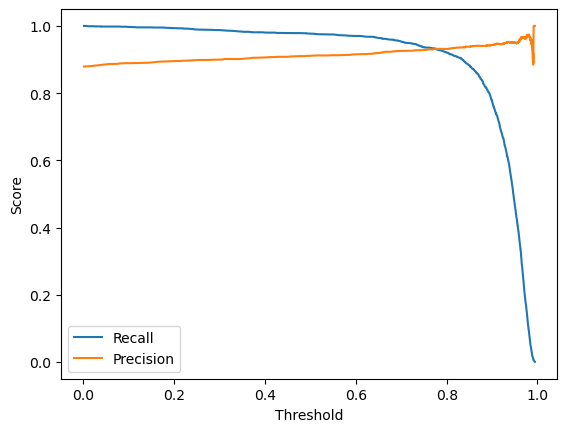

In [260]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

precision_for_plot = precision[1:]
recall_for_plot    = recall[1:]

plt.plot(thresholds, recall_for_plot,    label='Recall')
plt.plot(thresholds, precision_for_plot, label='Precision')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

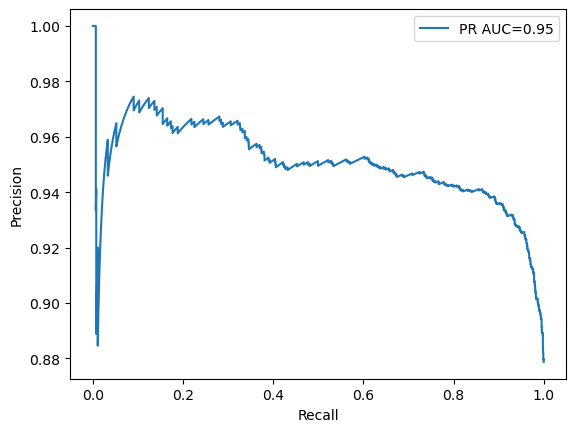

In [262]:
pr_auc = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label=f'PR AUC={pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [264]:
#y_prob = model.predict(X_test_scaled).ravel()
y_pred = (y_prob >= 0.8).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 148  143]
 [ 167 1942]]
              precision    recall  f1-score   support

           0       0.47      0.51      0.49       291
           1       0.93      0.92      0.93      2109

    accuracy                           0.87      2400
   macro avg       0.70      0.71      0.71      2400
weighted avg       0.88      0.87      0.87      2400



In [266]:
#y_prob = model.predict(X_test_scaled).ravel()
y_pred = (y_prob >= 0.75).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 139  152]
 [ 133 1976]]
              precision    recall  f1-score   support

           0       0.51      0.48      0.49       291
           1       0.93      0.94      0.93      2109

    accuracy                           0.88      2400
   macro avg       0.72      0.71      0.71      2400
weighted avg       0.88      0.88      0.88      2400



In [268]:
#y_prob = model.predict(X_test_scaled).ravel()
y_pred = (y_prob >= 0.9).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 193   98]
 [ 471 1638]]
              precision    recall  f1-score   support

           0       0.29      0.66      0.40       291
           1       0.94      0.78      0.85      2109

    accuracy                           0.76      2400
   macro avg       0.62      0.72      0.63      2400
weighted avg       0.86      0.76      0.80      2400



## Attempts at increasing recall for class 0

In [271]:
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization, LeakyReLU
from tensorflow.keras import Sequential

model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    
    Dense(128),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.1),
    
    Dense(64),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.1),
    
    Dense(32),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.1),
    
    Dense(1, activation='sigmoid')
])

In [273]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.Recall(name='recall'),
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.F1Score(name='F1'),
             tf.keras.metrics.AUC(name='AUC'),
             'accuracy']
)

In [275]:
history3 = model.fit(
    X_train_scaled, y_train_res,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    verbose=2
)

Epoch 1/20
246/246 - 5s - 19ms/step - AUC: 0.9127 - F1: 0.7693 - accuracy: 0.8598 - loss: 0.3398 - precision: 0.8741 - recall: 0.9062 - val_AUC: 0.0000e+00 - val_F1: 0.0000e+00 - val_accuracy: 0.9623 - val_loss: 0.0894 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
246/246 - 1s - 3ms/step - AUC: 0.9358 - F1: 0.7693 - accuracy: 0.9003 - loss: 0.2689 - precision: 0.8862 - recall: 0.9643 - val_AUC: 0.0000e+00 - val_F1: 0.0000e+00 - val_accuracy: 0.9766 - val_loss: 0.0645 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
246/246 - 1s - 3ms/step - AUC: 0.9420 - F1: 0.7693 - accuracy: 0.9054 - loss: 0.2532 - precision: 0.8890 - recall: 0.9698 - val_AUC: 0.0000e+00 - val_F1: 0.0000e+00 - val_accuracy: 0.9842 - val_loss: 0.0519 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
246/246 - 1s - 3ms/step - AUC: 0.9446 - F1: 0.7693 - accuracy: 0.9094 - loss: 0.2443 - precision: 0.8922 - recall: 0.9725 - val_AUC: 0.0000e+00 - val_F1: 0.0000e+00 - val_accu

In [277]:
y_prob = model.predict(X_test_scaled).ravel()
y_pred = (y_prob >= 0.5).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
[[  95  196]
 [  62 2047]]
              precision    recall  f1-score   support

           0       0.61      0.33      0.42       291
           1       0.91      0.97      0.94      2109

    accuracy                           0.89      2400
   macro avg       0.76      0.65      0.68      2400
weighted avg       0.88      0.89      0.88      2400



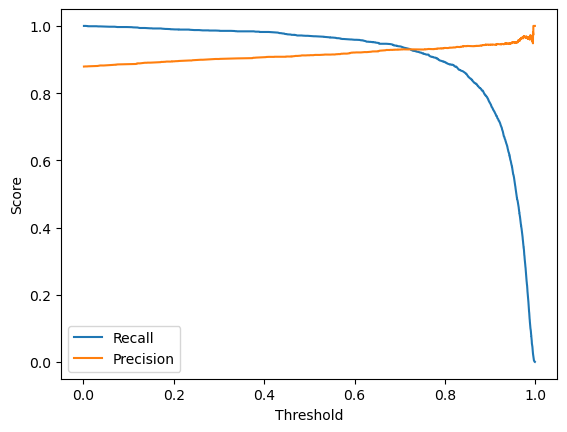

In [279]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

precision_for_plot = precision[1:]
recall_for_plot    = recall[1:]

plt.plot(thresholds, recall_for_plot,    label='Recall')
plt.plot(thresholds, precision_for_plot, label='Precision')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

In [281]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

opt = Adam(learning_rate=1e-4)

In [283]:
model.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.Recall(name='recall'),
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.F1Score(name='F1'),
             tf.keras.metrics.AUC(name='AUC'),
             'accuracy']
)

In [285]:
es = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)
rlr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6
)

In [287]:
history4 = model.fit(
    X_train_scaled, y_train_res,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[es, rlr],
    verbose=2
)

Epoch 1/100
123/123 - 5s - 40ms/step - AUC: 0.9646 - F1: 0.7741 - accuracy: 0.9309 - loss: 0.1907 - precision: 0.9140 - recall: 0.9818 - val_AUC: 0.0000e+00 - val_F1: 0.0000e+00 - val_accuracy: 0.9867 - val_loss: 0.0261 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/100
123/123 - 0s - 3ms/step - AUC: 0.9651 - F1: 0.7742 - accuracy: 0.9317 - loss: 0.1884 - precision: 0.9165 - recall: 0.9800 - val_AUC: 0.0000e+00 - val_F1: 0.0000e+00 - val_accuracy: 0.9867 - val_loss: 0.0261 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/100
123/123 - 1s - 6ms/step - AUC: 0.9657 - F1: 0.7736 - accuracy: 0.9337 - loss: 0.1858 - precision: 0.9173 - recall: 0.9825 - val_AUC: 0.0000e+00 - val_F1: 0.0000e+00 - val_accuracy: 0.9867 - val_loss: 0.0259 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 4/100
123/123 - 0s - 4ms/step - AUC: 0.9658 - F1: 0.7735 - accuracy: 0.9329 - loss: 0.1862 - 

In [289]:
y_prob = model.predict(X_test_scaled).ravel()
y_pred = (y_prob >= 0.5).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step
[[ 106  185]
 [  55 2054]]
              precision    recall  f1-score   support

           0       0.66      0.36      0.47       291
           1       0.92      0.97      0.94      2109

    accuracy                           0.90      2400
   macro avg       0.79      0.67      0.71      2400
weighted avg       0.89      0.90      0.89      2400



In [291]:
# Set seed for reproducibility
tf.random.set_seed(0)

# Define the model
model = Sequential([
    InputLayer(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy',
             tf.keras.metrics.Recall(name='recall'),
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.AUC(name='AUC')]
)

# Set up early stopping with a more basic configuration first
es = EarlyStopping(
    monitor='val_loss',  # Changed from val_recall to val_loss
    patience=5,
    restore_best_weights=True
)

# Try fitting the model with a try-except block to catch errors
try:
    history5 = model.fit(
        X_train_scaled, y_train_res,
        validation_split=0.2,
        epochs=20,
        batch_size=32,
        callbacks=[es],
        verbose=1  # Changed from 2 to 1 for more information
    )
except Exception as e:
    print(f"Error during training: {e}")
    # Try to print shapes again in case they changed during processing
    print("X shape:", X_train_scaled.shape)
    print("y shape:", y_train_res.shape)

Epoch 1/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7305 - accuracy: 0.6936 - loss: 0.5761 - precision: 0.7340 - recall: 0.7931 - val_AUC: 0.0000e+00 - val_accuracy: 0.8894 - val_loss: 0.2543 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.9162 - accuracy: 0.8686 - loss: 0.3293 - precision: 0.8654 - recall: 0.9341 - val_AUC: 0.0000e+00 - val_accuracy: 0.9327 - val_loss: 0.1408 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.9339 - accuracy: 0.8924 - loss: 0.2771 - precision: 0.8773 - recall: 0.9616 - val_AUC: 0.0000e+00 - val_accuracy: 0.9546 - val_loss: 0.0915 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9387 - accuracy: 0.9055 - loss: 0.2574 - precision: 0.8885 - recall: 0.9699 - val_AUC: 0.0000e+00 - val_accuracy: 0.9638 - val_loss: 0.0708 - val_precision: 0.0000e+00 - val_rec

In [293]:
y_prob = model.predict(X_test_scaled).ravel()
y_pred = (y_prob >= 0.5).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step
[[  93  198]
 [  46 2063]]
              precision    recall  f1-score   support

           0       0.67      0.32      0.43       291
           1       0.91      0.98      0.94      2109

    accuracy                           0.90      2400
   macro avg       0.79      0.65      0.69      2400
weighted avg       0.88      0.90      0.88      2400



The best model is still XGBoost with 91.5%. Our model excels in predicting conversion but it is less useful for the no conversion categor, despite the oversampling and variety of techniques used.